# What is machine learning anyway?


####  Formal definition: 

- A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E." [Mitchell]


#### Informal definition:  
- A type of artificial intelligence (AI) that provides computers with the ability to learn without being explicitly programmed


# But what does this mean?


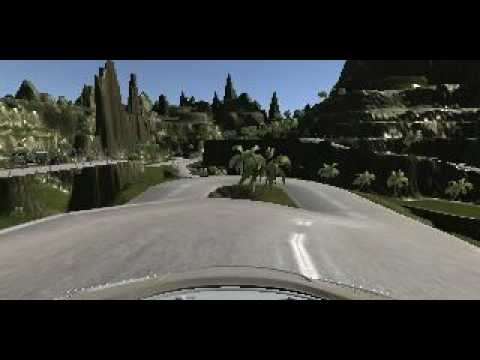

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('gcPq7SO_XZs')

# Convolutional neural net for behavioural cloning

#### Train a neural net to predict steering wheel angle based on training images and then, drive!


# Programming machines to learn

- Let's teach a machine to recognize handwritten digits
- Download MNIST dataset  [60,000 training examples,test set of 10,000 examples]


In [2]:
from keras.datasets import mnist 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


(60000, 28, 28)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


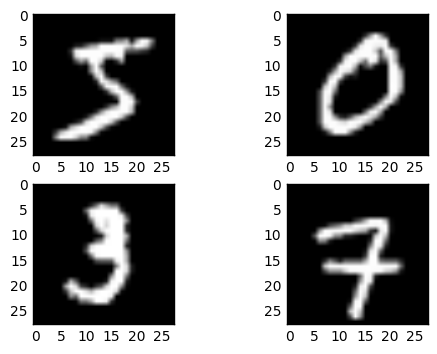

In [4]:
image = X_train[0,:]
plt.subplot( 221 )
plt.imshow( image , cmap='gray')

image = X_train[1,:]
plt.subplot( 222 )
plt.imshow( image , cmap='gray')

image = X_train[10,:]
plt.subplot( 223 )
plt.imshow( image , cmap='gray')

image = X_train[324,:]
plt.subplot( 224 )
plt.imshow( image , cmap='gray')
plt.show()

## Our goal would be to _train_  a _neural net_ to recognize digits. 

Reminder: We would like the network to be able to recognize previously unseen digits. This is called generelization in machine learning jargon



- What people believe neural nets are:
    ![alt text](./media/nnet_plot1.jpg "Neural Net")

- What neural nets actually are:
    ![alt text](./media/nn_formula.png "Neural Net")

- How neural nets actually learn:
    ![alt text](./media/backprop.jpg "Backpropagation")

- How neural nets are actually used in practice:
    ![alt text](./media/keras.png "Keras")
    
    

# So, let's get started, first things first



#### Training
 - We have 60K handwritten digits. This would be our training set
 - We also have 10K digits to be used as our test set.
 - We train our model on the training set and then we evaluate how well it performs on the test set
 - Which raises the question, what "well" means? In this context it is simple: "Are we classifying digits correctly?"
 
 
#### But why do we need test and training sets?
 - We need training and test sets to examine if the model is capable to generalize in unseen data. So, our test set acts as unseen data. If we test the model with the data it has been trained with, we risk overfitting: The neural net has memorized the entire training dataset but it becomes incapable of recognizing new images, outside the training set
    
    
## Before going deep, let's start with a simple model: Multiclass Logistic Regression
 
##### Input :  unroll each 28x28 pixels image to a vector of 784 positions. each dimention is the grayscale intenstity of the pixel [0,255]
##### Target: encode labels as a 10-positions vector. This is called 1-hot encoding. All positions of the vector are zero except the one of the actuall label

    - output vector for 0 would be [1,0,0,0,0,0,0,0,0,0]
    - output vector for 1 would be [0,1,0,0,0,0,0,0,0,0]
    - etc
    
    
#### Convert inputs to real value vectors and rescale between [0,1], this is good practice for machine learning in general



In [55]:
input_dim = 784 #28*28 
X_train = X_train.reshape(60000, input_dim) 
X_test = X_test.reshape(10000, input_dim) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 

X_train /= 255 
X_test /= 255

In [21]:
from keras.utils import np_utils 
nb_classes = 10 #10 digits
Y_train = np_utils.to_categorical(y_train, nb_classes) 
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [22]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
output_dim = nb_classes = 10 
model = Sequential() 

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax')) 
batch_size = 128 
nb_epoch = 20

## Danger: Math Zone. This is were things are becoming tricky but we won't spent too much time here (at least not now)

 -  **SDG** : Stochastic Gradient Descent, the algorithm used to optimize the loss function
 -  **Loss function**: The internal representation of the model what "good" looks like. In our case, cross entropy is a measure of how close is the prediction to the actual label of the image
 
 

In [23]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 

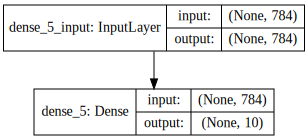

In [24]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

#### fit the model

In [9]:
#fit the model
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, 
                    epochs=nb_epoch,
                    verbose=1, 
                    validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s - loss: 1.2727 - acc: 0.7038 - val_loss: 0.8113 - val_acc: 0.8347
Epoch 2/20
60000/60000 [==============================] - 1s - loss: 0.7139 - acc: 0.8421 - val_loss: 0.6072 - val_acc: 0.8627
Epoch 3/20
60000/60000 [==============================] - 1s - loss: 0.5861 - acc: 0.8604 - val_loss: 0.5253 - val_acc: 0.8746
Epoch 4/20
60000/60000 [==============================] - 1s - loss: 0.5247 - acc: 0.8697 - val_loss: 0.4795 - val_acc: 0.8809
Epoch 5/20
60000/60000 [==============================] - 1s - loss: 0.4873 - acc: 0.8756 - val_loss: 0.4495 - val_acc: 0.8860
Epoch 6/20
60000/60000 [==============================] - 1s - loss: 0.4616 - acc: 0.8803 - val_loss: 0.4283 - val_acc: 0.8897
Epoch 7/20
60000/60000 [==============================] - 1s - loss: 0.4425 - acc: 0.8835 - val_loss: 0.4121 - val_acc: 0.8926
Epoch 8/20
60000/60000 [==============================] - 1s 

#### and evaluate

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [11]:
print('Test score:', score[0]) #the loss
print('Test accuracy:', score[1]) #the accuracy

('Test score:', 0.33523071653246878)
('Test accuracy:', 0.90800000000000003)


### Yay! We trained a simple shallow model, able to recognize digits with 90% accuracy!


### Time to go deep:
    - Let's try a multilayer neural net with two hidden layers of 512 dimensions 
    


In [56]:
from keras.optimizers import RMSprop
from keras.utils import to_categorical


batch_size = 128
num_classes = 10
epochs = 20

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

mlp_model = Sequential()
mlp_model.add(Dense(512, activation='relu', input_shape=(784,)))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))

mlp_model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


(60000, 'train samples')
(10000, 'test samples')


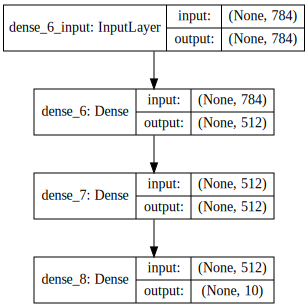

In [26]:
SVG(model_to_dot(mlp_model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [27]:
history = mlp_model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s - loss: 0.2164 - acc: 0.9326 - val_loss: 0.1283 - val_acc: 0.9584
Epoch 2/20
60000/60000 [==============================] - 7s - loss: 0.0798 - acc: 0.9760 - val_loss: 0.0744 - val_acc: 0.9771
Epoch 3/20
60000/60000 [==============================] - 7s - loss: 0.0538 - acc: 0.9832 - val_loss: 0.0936 - val_acc: 0.9739
Epoch 4/20
60000/60000 [==============================] - 7s - loss: 0.0396 - acc: 0.9878 - val_loss: 0.0720 - val_acc: 0.9809
Epoch 5/20
60000/60000 [==============================] - 7s - loss: 0.0304 - acc: 0.9909 - val_loss: 0.0986 - val_acc: 0.9752
Epoch 6/20
60000/60000 [==============================] - 7s - loss: 0.0236 - acc: 0.9930 - val_loss: 0.0923 - val_acc: 0.9798
Epoch 7/20
60000/60000 [==============================] - 7s - loss: 0.0185 - acc: 0.9942 - val_loss: 0.0977 - val_acc: 0.9800
Epoch 8/20
60000/60000 [==============================] - 7s 

In [38]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.165429750596
Test accuracy: 0.9782


## Wow! We now have a multilayer neural network that can recognize digits with 97% accuracy! However.... 





![alt text](./media/inception.jpg "Need to go deeper")

## Enter Convolutional Neural Nets

In [52]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta
from keras import backend as K
epochs = 15

img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)




deep_model = Sequential()
deep_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
deep_model.add(Conv2D(64, (3, 3), activation='relu'))
deep_model.add(MaxPooling2D(pool_size=(2, 2)))
deep_model.add(Dropout(0.25))
deep_model.add(Flatten())
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dropout(0.5))
deep_model.add(Dense(num_classes, activation='softmax'))


SVG(model_to_dot(mlp_model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))


deep_model.compile(loss='categorical_crossentropy',
              optimizer=Adadelta(),
              metrics=['accuracy'])


In [53]:
deep_model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
score = deep_model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 136s - loss: 0.3341 - acc: 0.8985 - val_loss: 0.0779 - val_acc: 0.9763
Epoch 2/15
60000/60000 [==============================] - 142s - loss: 0.1158 - acc: 0.9666 - val_loss: 0.0564 - val_acc: 0.9823
Epoch 3/15
60000/60000 [==============================] - 147s - loss: 0.0855 - acc: 0.9749 - val_loss: 0.0438 - val_acc: 0.9853
Epoch 4/15
60000/60000 [==============================] - 145s - loss: 0.0715 - acc: 0.9787 - val_loss: 0.0373 - val_acc: 0.9880
Epoch 5/15
60000/60000 [==============================] - 141s - loss: 0.0625 - acc: 0.9810 - val_loss: 0.0346 - val_acc: 0.9882
Epoch 6/15
60000/60000 [==============================] - 144s - loss: 0.0557 - acc: 0.9836 - val_loss: 0.0334 - val_acc: 0.9887
Epoch 7/15
60000/60000 [==============================] - 144s - loss: 0.0511 - acc: 0.9847 - val_loss: 0.0360 - val_acc: 0.9889
Epoch 8/15
60000/60000 [=======================

## Accuracy on the test set: 99.1% 

![alt text](./media/micdrop.jpg "Micdrop")

## But ...
    - What is Softmax?
    - What is Convolution?
    - What is Dropout?
    - What is the definition of Cross Entropy?
    - What SGD means and why are you using different Optimization strategies?
    - What is a RELU activation? How about Sigmoid and Tanh activations? Aren't they good anymore?
    - How can I apply ML on my own problems?
    - How do I avoid overfiting? 
    - When do I need more data?
    - What about regression?
    
    
We are happy to answer any questions you may have! :)
    